### Rainfall data 

In [2]:
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import image as mpimg
from matplotlib.pyplot import figure

In [3]:
rainfall = pd.DataFrame()
Black_volta = pd.read_csv(r'C:\Users\sophi\Volta-burkina-faso\data\rainfall data volta\Black_Volta.csv', parse_dates = [0], index_col=[0]) 
Lake_Volta = pd.read_csv(r'C:\Users\sophi\Volta-burkina-faso\data\rainfall data volta\Lake_Volta.csv', parse_dates = [0], index_col=[0])
Mouhoun = pd.read_csv(r'C:\Users\sophi\Volta-burkina-faso\data\rainfall data volta\Mouhoun.csv', parse_dates = [0], index_col=[0]) 
Nakambe = pd.read_csv(r'C:\Users\sophi\Volta-burkina-faso\data\rainfall data volta\Nakambe.csv', parse_dates = [0], index_col=[0])
Oti = pd.read_csv(r'C:\Users\sophi\Volta-burkina-faso\data\rainfall data volta\Oti.csv', parse_dates = [0], index_col=[0]) 
Penjari = pd.read_csv(r'C:\Users\sophi\Volta-burkina-faso\data\rainfall data volta\Pendjari.csv', parse_dates = [0], index_col=[0])


In [21]:
names_col = ['Black_volta', 'Lake_Volta', 'Mouhoun', 'Nakambe', 'Oti', 'Penjari'] 
Rainfall_data = pd.concat([Black_volta, Lake_Volta, Mouhoun, Nakambe, Oti, Penjari], axis = 1, keys = names_col, ignore_index=False)

,Black_volta,Lake_Volta,Mouhoun,Nakambe,Oti,Penjari
,precipitation,precipitation,precipitation,precipitation,precipitation,precipitation
time,,,,,,
1979-01-01,79.92,0.36,0.00,6.40,17.94,3.91
1979-01-02,1.35,1.73,0.03,41.13,17.04,23.17
1979-01-03,0.60,0.05,0.35,0.60,7.73,7.14
1979-01-04,2.18,0.76,0.29,1.50,12.19,22.03
1979-01-05,0.22,0.06,2.41,2.99,0.26,0.95
...,...,...,...,...,...,...
2017-10-27,0.53,0.89,15.05,18.01,7.05,0.22
2017-10-28,16.42,5.36,13.62,6.71,35.61,15.70


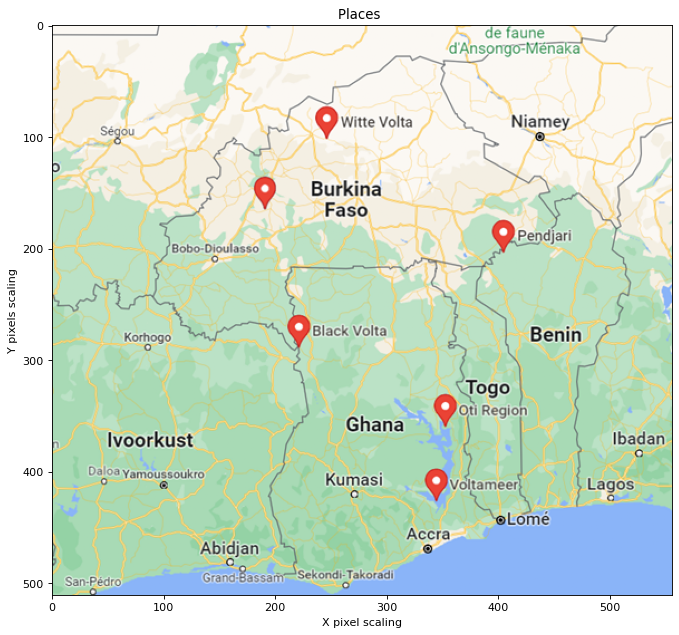

In [5]:
# where are the different places ?
image = mpimg.imread(r'C:\Users\sophi\Volta-burkina-faso\data\rainfall data volta\places.png')

figure(figsize=(10, 10), dpi=80)

plt.title("Places ")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")

plt.imshow(image)
plt.show()

In [6]:
#making dataframe smaller to 2014-2018
Rainfall_data_2014 = Rainfall_data.loc['2014-01-01':, :]
Rainfall_data_2014.loc['2017-01-01':'2017-12-30'].head()

,Black_volta,Lake_Volta,Mouhoun,Nakambe,Oti,Penjari
,precipitation,precipitation,precipitation,precipitation,precipitation,precipitation
time,,,,,,
2017-01-01,1.78,0.00,0.16,1.84,0.10,0.00
2017-01-02,0.58,0.00,4.46,0.01,5.31,0.00
2017-01-03,7.94,5.46,10.57,1.52,6.85,0.00
2017-01-04,0.75,3.50,19.85,1.87,2.34,1.70
2017-01-05,24.13,16.58,2.60,0.27,43.99,0.49


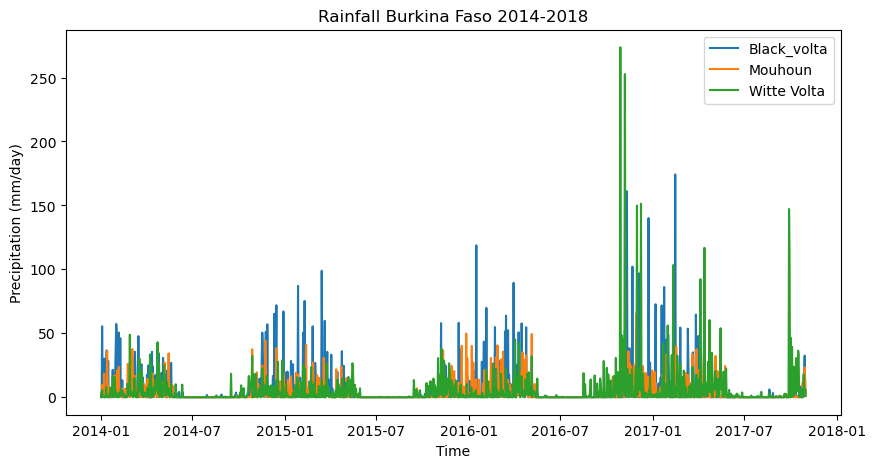

In [7]:
#plotting data from 2014 - 2018
plt.figure(figsize=(10,5))
plt.plot(Rainfall_data_2014.loc[:, 'Black_volta'], label = 'Black_volta')
plt.plot(Rainfall_data_2014.loc[:, 'Mouhoun'], label = 'Mouhoun')
plt.plot(Rainfall_data_2014.loc[:, 'Nakambe'], label = 'Witte Volta')
plt.xlabel('Time')
plt.ylabel('Precipitation (mm/day)')
plt.title('Rainfall Burkina Faso 2014-2018');
plt.legend();

Notes: 
- Rainfall has become more extreme 
- high seasonality: dry and wet season 

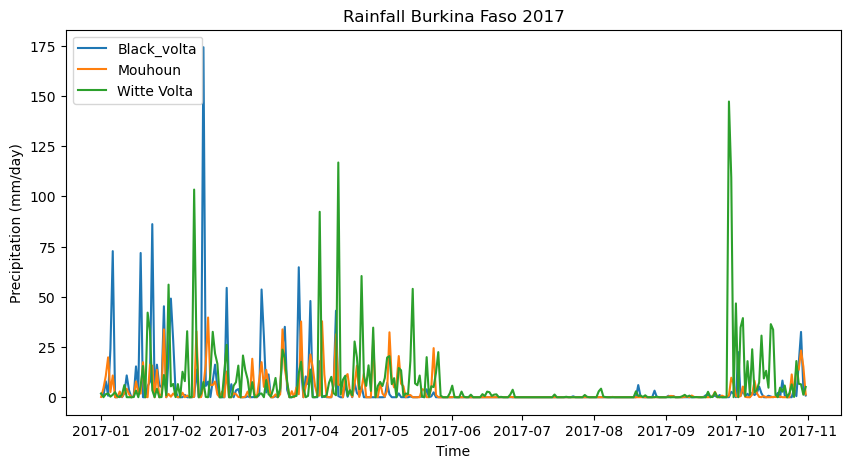

In [20]:
#plotting data in 2017
plt.figure(figsize=(10,5))
plt.plot(Rainfall_data_2014.loc['2017-01-01':'2017-12-30', 'Black_volta'], label = 'Black_volta')
plt.plot(Rainfall_data_2014.loc['2017-01-01':'2017-12-30', 'Mouhoun'], label = 'Mouhoun')
plt.plot(Rainfall_data_2014.loc['2017-01-01':'2017-12-30', 'Nakambe'], label = 'Witte Volta')
plt.title('Rainfall Burkina Faso 2017')
plt.xlabel('Time')
plt.ylabel('Precipitation (mm/day)')
plt.legend();

Notes: 
- Very dry season from june untill september / october
- Little bit of rain from september 
- Wet season from January / February 
- More heavy rains in Witte Volta and Black Volta then in Mouhoun. 
- High peaks and low lows 
- Maximum Black volta in 2017 is around 175 mm/day

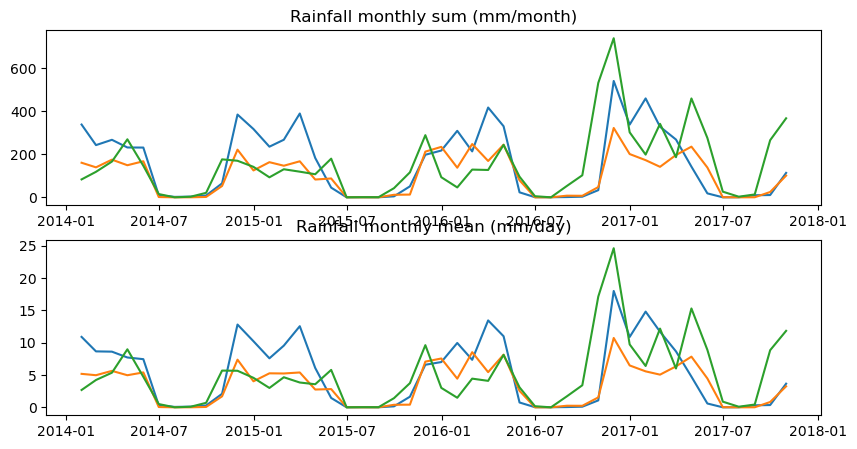

In [19]:
# sorting to only B.F 
Rainfall_sorted_BF = Rainfall_data_2014.loc[:,['Black_volta','Mouhoun', 'Nakambe']] 
Rainfall_BF_msum = Rainfall_sorted_BF.resample('M').sum()
Rainfall_BF_mmean = Rainfall_sorted_BF.resample('M').mean()

#plotting monthly sum and mean 
plt.figure(figsize= (10,5))

plt.subplot(2, 1, 1)
plt.title('Rainfall monthly sum (mm/month)')
plt.plot(Rainfall_BF_msum)
plt.subplot(2, 1, 2)
plt.title('Rainfall monthly mean (mm/day)')
plt.plot(Rainfall_BF_mmean);

In [17]:
# resample yearly
Rainfall_BF_ysum = Rainfall_sorted_BF.resample('Y').sum()
Rainfall_BF_ymean = Rainfall_sorted_BF.resample('Y').mean()
Rainfall_BF_ysum

,Black_volta,Mouhoun,Nakambe
,precipitation,precipitation,precipitation
time,,,
2014-12-31,2097.18,1192.25,1308.69
2015-12-31,1589.46,1117.54,1169.76
2016-12-31,2206.71,1461.26,2371.36
2017-12-31,1348.87,1009.80,2133.28


Notes: 
- rainfall sum is extremely high 
- monthly mean is also high, but seems less extreme 

General Notes: 
- Only have data up till 2017 
- It seems that that there is a trend going on with more extreme rains and droughts, but that needs to be searched out 

### Evaporation 

- monthly potential evaporation is the whole year very high
- 200mm (monthly) from november -may
- 140 to 150mm from june-september 

- Usefull to calculate rainfall deficit 

### Discharge 

In [48]:
Discharge = pd.read_fwf(r'C:\Users\sophi\Volta-burkina-faso\data\discharge data volta\volt_day.txt', delim_whitespace=True, ) 
Discharge

,MOU HOUN (VOLTA NOIRE) SAMANDENI,Unnamed: 1
0,2.000 2.000 2.000 2.000 2.000 2.000 2.000 2.0...,1 11977
1,2.000 2.000 2.000 2.000 2.000 2.000 2.000 2.0...,2 11977
2,2.000 2.000 2.000 2.000 2.000 2.000 2.000 2.0...,3 11977
3,2.000 2.000 2.000 2.000 2.000 2.000 2.000 2.0...,1 21977
4,2.000 2.000 2.000 2.000 2.000 2.000 2.000 2.0...,2 21977
...,...,...
2502,9999. 9999. 9999. 9999. 9999. 9999. 9999. 999...,2111993
2503,28.70028.40030.80032.40032.50032.10032.70032.1...,3111993
2504,30.40030.00029.40029.00028.60028.60028.60027.9...,1121993
2505,26.00025.40024.80024.20023.60022.80021.60020.5...,2121993


Notes: 
- name station is : samandeni 
- it is in the mouhoun region 
- only datat uptil 1993 

Other usefull data:
1) Annual discharge Volta river Delta
https://www.mdpi.com/2073-4441/13/22/3198 

2) Data collection plan:
 http://abv.int/wp-content/uploads/2022/02/Annex1_Exchanging_data_information_Eng.pdf

3) Annual discharges, black volta, white volta, oti (2005): 
https://www.iwmi.cgiar.org/assessment/files_new/research_projects/river_basin_development_and_management/VoltaRiverBasin_Boubacar.pdf
The mean annual flows of the Black Volta, White Volta, and Oti River are 
7,673 x 10^6, 
9,565 x 10^6, 
and 11,215 x 10^6 m3/year respectively

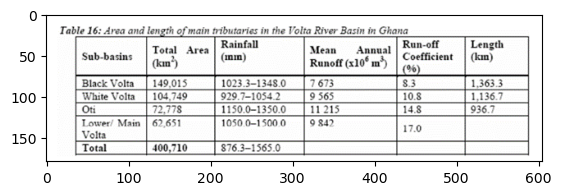

In [50]:
image2 = mpimg.imread(r'C:\Users\sophi\Volta-burkina-faso\data\discharge data volta\data_volta.png')
plt.imshow(image2)
plt.show()